In [203]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

In [204]:
path_data = "..\\data\\NOMAL.xlsx"
raw_df = pd.read_excel(path_data)

In [205]:
raw_df.head(5)

,Codice identificativo:,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,Cirrosi,IRC,Ritardo terapeutico,Malaria grave,GCS,Seizures,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numero criteri,Malaria Complicata,Quali criteri di malaria complicata sono presenti? [Ipotensione (PAS < 90mmHg nell’adulto)],"Quali criteri di malaria complicata sono presenti? [Sanguinamento spontaneo (sanguinamento minore, macroemoglobinuria)]",Quali criteri di malaria complicata sono presenti? [Insufficienza respiratoria sO2 20/min],Quali criteri di malaria complicata sono presenti? [Interessamento d’organo (es. polmonite)],Quali criteri di malaria complicata sono presenti? [Anemia Hb < 10 g/dl],Quali criteri di malaria complicata sono presenti? [Creatinina ≥ 2mg/dl],Quali criteri di malaria complicata sono presenti? [Oliguria (< a 600ml/24 ore)],Quali criteri di malaria complicata sono presenti? [Bilirubina totale≥ 2mg/dl],Quali criteri di malaria complicata sono presenti? [PT% ≤ 50%],Quali criteri di malaria complicata sono presenti? [Ast/alt > 3 VN],Quali criteri di malaria complicata sono presenti? [Parassitemia periferica ≥ 2%],RDT,Emoscopia,NAAT,Falciparum,Ovale,Parassitemia valore assoluto,Percentuale parassitemia,Pregressa malaria,Sub-Saharan Africa,Profilassi,PA sistolica,PA diastolica,FC,FR,Altezza,Peso,Temperatura,QTc ingresso,QTc dopo ACT,QTC dopo ultima somministrazione artesunato *,T0. [GB (in cell/ul):],T0. [GR (in cell/ul):],T0. [Hb (in g/dl):],T0. [PLT (in cell/ul):],T0. [Glicemia (in mg/dl):],T0. [Azotemia (in mg/dl):],T0. [Creatinina (in mg/dl):],T0. [LDH (in U/L):],T0. [AST (in U/L):],T0. [ALT (in U/L):],T0. [Bilirubina tot (in mg/dl):],T0. [Bilirubina diretta (in mg/dl):],T0. [Sodio (in mEq/l):],T0. [Potassio (in mEq/l):],T0. [Ca (in mg/dl):],T0. [INR:],T0. [fibrinogeno (in mg/dl):],T0. [pH:],T0. [bicarbonati (in mmol/l):],T0. [Lattati # (in mmol/l):],T1. [Goccia spessa e striscio periferico:],T1. [TC (temperatura corporea) in °C:],T2. [Goccia spessa e striscio periferico:],T2. [TC (temperatura corporea) in °C:],T3. [Goccia spessa e striscio periferico:],T3. [TC (temperatura corporea) in °C:],T7. [Goccia spessa e striscio periferico:],T7. [TC (temperatura corporea) in °C:],Artesunato ev: Somministrazione [1][Data inizio e ora],Artemether/ Lumefantrina: Somministrazione [1][Data inizio e ora],Diidroartemisinina/Piperachina: Somministrazione [1][Data inizio e ora],ACT,Artesunato + ACT,Atovaquone/Proguanile,Doxiciclina per os,Clindamicina,Antibiotici,Chinino,Primachina,Durata Artesunato,Permanenza in Terapia Intensiva (giorni):,Trasferimento in Rianimazione (anche in altro centro)?,Guarigione,Unnamed: 100,Durata ricovero,Decesso.,ICU,Eventuali sequele:,"PADH, post-artesunate delayed haemoly1s)",Insorgenza PADH,Si prega di fornire tutti i parameri vitali. [GB (in cell/ul):],Si prega di fornire tutti i parameri vitali. [Hb (in g/dl):],Si prega di fornire tutti i parameri vitali. [PLT (in cell/ul):],Si prega di fornire tutti i parameri vitali. [reticoliti (in cell/ul):],Si prega di fornire tutti i parameri vitali. [LDH (in U/l)lcio:],Si prega di fornire tutti i parameri vitali. [AST (U/L):],Si prega di fornire tutti i parameri vitali. [ALT (U/L):],Si prega di fornire tutti i parameri vitali. [Bilirubina tot (mg/dl):],Si prega di fornire tutti i parameri vitali. [Bilirubina diretta (mg/dl):],Si prega di fornire tutti i parameri vitali. [aptoglobina (in mg/dl):],Si prega di fornire tutti i parameri vitali. [test di Coombs diretto:],Si prega di fornire tutti i parameri vitali. [test di coombs indiretto:],Vuole riportare ulteriori informazioni relative ai prelievi effettuati durante le visite intermedie fino alla risoluzione dell’emolisi?,Nadir Hb,Trasfusione:,Unità trasfuse,Altri eventi avversi,Diarrea e disidratazione,Ipertransaminasemia tardiva,Polmonite,IVU nosocomiale,Esofagite,Dispepsia,Tachiaritmia sopraventricolare
0,3761,1,1,57,0.0,0,0,0,0,0,7.0,1,0,0,1,0,0,0,0,0,0,0.0,0,

**Data Cleaning**

Remove columns for which each row have the same value.

In [206]:
# Remove features with constant values
noInfo_columns = raw_df.columns[raw_df.nunique() <= 1] # columns with no values or with only the same value

filtered_df = raw_df.loc[:, raw_df.nunique() > 1] # this operation also removes the empty columns


# Print the removed columns
print("Removed columns:")
for column in noInfo_columns :
    print(column)

Removed columns:
Cirrosi
Malaria grave
Seizures
Malaria Complicata
Quali criteri di malaria complicata sono presenti? [Ipotensione (PAS < 90mmHg nell’adulto)]
Quali criteri di malaria complicata sono presenti? [Sanguinamento spontaneo (sanguinamento minore, macroemoglobinuria)]
Quali criteri di malaria complicata sono presenti? [Insufficienza respiratoria sO2 20/min]
Quali criteri di malaria complicata sono presenti? [Interessamento d’organo (es. polmonite)]
Quali criteri di malaria complicata sono presenti? [Anemia Hb < 10 g/dl]
Quali criteri di malaria complicata sono presenti? [Creatinina ≥ 2mg/dl]
Quali criteri di malaria complicata sono presenti? [Oliguria (< a 600ml/24 ore)]
Quali criteri di malaria complicata sono presenti? [Bilirubina  totale≥ 2mg/dl]
Quali criteri di malaria complicata sono presenti? [PT%  ≤ 50%]
Quali criteri di malaria complicata sono presenti? [Ast/alt  > 3 VN]
Quali criteri di malaria complicata sono presenti? [Parassitemia periferica ≥ 2%]
RDT
Sub-Saharan

/!\ RDT has missing values but all the values are the same /!\

/!\ Need to see with Tomasso /!\

In [207]:
filtered_df.head(5)

,Codice identificativo:,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,IRC,Ritardo terapeutico,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numero criteri,Emoscopia,NAAT,Falciparum,Ovale,Parassitemia valore assoluto,Percentuale parassitemia,Pregressa malaria,Profilassi,PA sistolica,PA diastolica,FC,FR,Altezza,Peso,Temperatura,QTc ingresso,QTc dopo ACT,QTC dopo ultima somministrazione artesunato *,T0. [GB (in cell/ul):],T0. [GR (in cell/ul):],T0. [Hb (in g/dl):],T0. [PLT (in cell/ul):],T0. [Glicemia (in mg/dl):],T0. [Azotemia (in mg/dl):],T0. [Creatinina (in mg/dl):],T0. [LDH (in U/L):],T0. [AST (in U/L):],T0. [ALT (in U/L):],T0. [Bilirubina tot (in mg/dl):],T0. [Bilirubina diretta (in mg/dl):],T0. [Sodio (in mEq/l):],T0. [Potassio (in mEq/l):],T0. [Ca (in mg/dl):],T0. [INR:],T0. [fibrinogeno (in mg/dl):],T0. [pH:],T0. [bicarbonati (in mmol/l):],T0. [Lattati # (in mmol/l):],T1. [Goccia spessa e striscio periferico:],T1. [TC (temperatura corporea) in °C:],T2. [Goccia spessa e striscio periferico:],T2. [TC (temperatura corporea) in °C:],T3. [Goccia spessa e striscio periferico:],T3. [TC (temperatura corporea) in °C:],T7. [Goccia spessa e striscio periferico:],T7. [TC (temperatura corporea) in °C:],Artesunato ev: Somministrazione [1][Data inizio e ora],Artemether/ Lumefantrina: Somministrazione [1][Data inizio e ora],Diidroartemisinina/Piperachina: Somministrazione [1][Data inizio e ora],ACT,Artesunato + ACT,Atovaquone/Proguanile,Doxiciclina per os,Clindamicina,Antibiotici,Chinino,Primachina,Durata Artesunato,Permanenza in Terapia Intensiva (giorni):,Trasferimento in Rianimazione (anche in altro centro)?,Guarigione,Durata ricovero,Decesso.,ICU,Eventuali sequele:,"PADH, post-artesunate delayed haemoly1s)",Insorgenza PADH,Si prega di fornire tutti i parameri vitali. [GB (in cell/ul):],Si prega di fornire tutti i parameri vitali. [Hb (in g/dl):],Si prega di fornire tutti i parameri vitali. [PLT (in cell/ul):],Si prega di fornire tutti i parameri vitali. [reticoliti (in cell/ul):],Si prega di fornire tutti i parameri vitali. [LDH (in U/l)lcio:],Si prega di fornire tutti i parameri vitali. [AST (U/L):],Si prega di fornire tutti i parameri vitali. [ALT (U/L):],Si prega di fornire tutti i parameri vitali. [Bilirubina tot (mg/dl):],Si prega di fornire tutti i parameri vitali. [Bilirubina diretta (mg/dl):],Si prega di fornire tutti i parameri vitali. [test di Coombs diretto:],Vuole riportare ulteriori informazioni relative ai prelievi effettuati durante le visite intermedie fino alla risoluzione dell’emolisi?,Nadir Hb,Trasfusione:,Unità trasfuse,Altri eventi avversi,Diarrea e disidratazione,Ipertransaminasemia tardiva,Polmonite,IVU nosocomiale,Esofagite,Dispepsia,Tachiaritmia sopraventricolare
0,3761,1,1,57,0.0,0,0,0,0,7.0,0,1,0,0,0,0,0,0,0.0,0,0,1,1.0,NaN,1,0.0,NaN,1.0,0,0,110.0,60.0,65.0,14.0,160.0,55.0,37.8,NaN,NaN,NaN,4890.0,4210000.0,11.4,132000.0,99.0,29.0,0.94,338.0,31.0,33.0,1.08,NaN,136.0,3.4,8.40,1.15,NaN,NaN,NaN,NaN,NaN,36.8,NaN,36.8,1.0,36.9,NaN,NaN,0,0,0.0,0.0,0.0,1,0,0.0,0,0,0.0,NaN,0.0,0.0,1.0,4.0,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35319,0,0,62,0.0,0,0,0,0,7.0,0,1,0,0,0,0,0,0,0.0,0,0,1,1.0,NaN,1,0.0,NaN,1.0,0,0,140.0,90.0,124.0,14.0,159.0,70.0,38.5,NaN,NaN,NaN,5240.0,4980000.0,14.2,165000.0,104.0,40.0,1.00,260.0,31.0,39.0,0.82,NaN,140.0,3.9,9.40,1.19,NaN,NaN,NaN,NaN,NaN,37.5,NaN,NaN,1.0,37.2,NaN,NaN,0,0,0.0,0.0,0.0,1,0,0.0,0,0,0.0,NaN,0.0,0.0,1.0,NaN,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BS01,1,0,72,0.0,1,0,0,0,2.0,0,0,1,0,0,0,0,0,0.0,0,0,1,1.0,1.0,1,0.0,7.0,0.2,1,0,80.0,60.0,87.0,NaN,175.0,83.0,39.0,NaN,NaN,NaN,6000.0,3010000.0,9.4,123000.0,107.0,38.0,0.91,474.0,18.0,18.0,1.75,0.36,139.0,4.0,8.13,1.10,369.0,7.41,30.4,2.6,1.0,37.5,1.0,37.3,0.0,37.0,NaN,37.0,1,0,1.0,1.0,1.0,0,0,0.0,0,0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,0,0.0,0.

In [208]:
filtered_df.columns

Index(['Codice identificativo:', 'Sesso', 'Nazionalità', 'Età', 'Domicilio',
       'Comorbilità', 'Diabete', 'HIV', 'IRC', 'Ritardo terapeutico',
       ...
       'Trasfusione:', 'Unità trasfuse', 'Altri eventi avversi',
       'Diarrea e disidratazione', 'Ipertransaminasemia tardiva', 'Polmonite',
       'IVU nosocomiale', 'Esofagite', 'Dispepsia',
       'Tachiaritmia sopraventricolare'],
      dtype='object', length=111)

In [209]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Display the head of the dataframe with all columns
filtered_df.head()

,Codice identificativo:,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,IRC,Ritardo terapeutico,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numero criteri,Emoscopia,NAAT,Falciparum,Ovale,Parassitemia valore assoluto,Percentuale parassitemia,Pregressa malaria,Profilassi,PA sistolica,PA diastolica,FC,FR,Altezza,Peso,Temperatura,QTc ingresso,QTc dopo ACT,QTC dopo ultima somministrazione artesunato *,T0. [GB (in cell/ul):],T0. [GR (in cell/ul):],T0. [Hb (in g/dl):],T0. [PLT (in cell/ul):],T0. [Glicemia (in mg/dl):],T0. [Azotemia (in mg/dl):],T0. [Creatinina (in mg/dl):],T0. [LDH (in U/L):],T0. [AST (in U/L):],T0. [ALT (in U/L):],T0. [Bilirubina tot (in mg/dl):],T0. [Bilirubina diretta (in mg/dl):],T0. [Sodio (in mEq/l):],T0. [Potassio (in mEq/l):],T0. [Ca (in mg/dl):],T0. [INR:],T0. [fibrinogeno (in mg/dl):],T0. [pH:],T0. [bicarbonati (in mmol/l):],T0. [Lattati # (in mmol/l):],T1. [Goccia spessa e striscio periferico:],T1. [TC (temperatura corporea) in °C:],T2. [Goccia spessa e striscio periferico:],T2. [TC (temperatura corporea) in °C:],T3. [Goccia spessa e striscio periferico:],T3. [TC (temperatura corporea) in °C:],T7. [Goccia spessa e striscio periferico:],T7. [TC (temperatura corporea) in °C:],Artesunato ev: Somministrazione [1][Data inizio e ora],Artemether/ Lumefantrina: Somministrazione [1][Data inizio e ora],Diidroartemisinina/Piperachina: Somministrazione [1][Data inizio e ora],ACT,Artesunato + ACT,Atovaquone/Proguanile,Doxiciclina per os,Clindamicina,Antibiotici,Chinino,Primachina,Durata Artesunato,Permanenza in Terapia Intensiva (giorni):,Trasferimento in Rianimazione (anche in altro centro)?,Guarigione,Durata ricovero,Decesso.,ICU,Eventuali sequele:,"PADH, post-artesunate delayed haemoly1s)",Insorgenza PADH,Si prega di fornire tutti i parameri vitali. [GB (in cell/ul):],Si prega di fornire tutti i parameri vitali. [Hb (in g/dl):],Si prega di fornire tutti i parameri vitali. [PLT (in cell/ul):],Si prega di fornire tutti i parameri vitali. [reticoliti (in cell/ul):],Si prega di fornire tutti i parameri vitali. [LDH (in U/l)lcio:],Si prega di fornire tutti i parameri vitali. [AST (U/L):],Si prega di fornire tutti i parameri vitali. [ALT (U/L):],Si prega di fornire tutti i parameri vitali. [Bilirubina tot (mg/dl):],Si prega di fornire tutti i parameri vitali. [Bilirubina diretta (mg/dl):],Si prega di fornire tutti i parameri vitali. [test di Coombs diretto:],Vuole riportare ulteriori informazioni relative ai prelievi effettuati durante le visite intermedie fino alla risoluzione dell’emolisi?,Nadir Hb,Trasfusione:,Unità trasfuse,Altri eventi avversi,Diarrea e disidratazione,Ipertransaminasemia tardiva,Polmonite,IVU nosocomiale,Esofagite,Dispepsia,Tachiaritmia sopraventricolare
0,3761,1,1,57,0.0,0,0,0,0,7.0,0,1,0,0,0,0,0,0,0.0,0,0,1,1.0,NaN,1,0.0,NaN,1.0,0,0,110.0,60.0,65.0,14.0,160.0,55.0,37.8,NaN,NaN,NaN,4890.0,4210000.0,11.4,132000.0,99.0,29.0,0.94,338.0,31.0,33.0,1.08,NaN,136.0,3.4,8.40,1.15,NaN,NaN,NaN,NaN,NaN,36.8,NaN,36.8,1.0,36.9,NaN,NaN,0,0,0.0,0.0,0.0,1,0,0.0,0,0,0.0,NaN,0.0,0.0,1.0,4.0,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35319,0,0,62,0.0,0,0,0,0,7.0,0,1,0,0,0,0,0,0,0.0,0,0,1,1.0,NaN,1,0.0,NaN,1.0,0,0,140.0,90.0,124.0,14.0,159.0,70.0,38.5,NaN,NaN,NaN,5240.0,4980000.0,14.2,165000.0,104.0,40.0,1.00,260.0,31.0,39.0,0.82,NaN,140.0,3.9,9.40,1.19,NaN,NaN,NaN,NaN,NaN,37.5,NaN,NaN,1.0,37.2,NaN,NaN,0,0,0.0,0.0,0.0,1,0,0.0,0,0,0.0,NaN,0.0,0.0,1.0,NaN,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BS01,1,0,72,0.0,1,0,0,0,2.0,0,0,1,0,0,0,0,0,0.0,0,0,1,1.0,1.0,1,0.0,7.0,0.2,1,0,80.0,60.0,87.0,NaN,175.0,83.0,39.0,NaN,NaN,NaN,6000.0,3010000.0,9.4,123000.0,107.0,38.0,0.91,474.0,18.0,18.0,1.75,0.36,139.0,4.0,8.13,1.10,369.0,7.41,30.4,2.6,1.0,37.5,1.0,37.3,0.0,37.0,NaN,37.0,1,0,1.0,1.0,1.0,0,0,0.0,0,0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,0,0.0,0.

Special caracters will be a problem for the future as the following example shows. Let's remove them. 

In [210]:
if "T0. [GB (in cell/ul):]" in filtered_df.columns : 
    print("yes")

In [211]:
import re

# Function to remove special characters from a string
def remove_special_characters(string):
    return re.sub(r'\W+', '', string)

# Rename the features in filtered_df
filtered_df.rename(columns=lambda x: remove_special_characters(x), inplace=True)


c:\Users\balth\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [212]:
# Defining the categories for data

patient_general = ["Codice identificativo:", 'Sesso', 'Nazionalità', 'Età', 'Domicilio','Altezza','Peso', 'Sub-Saharan Africa', 'Pregressa malaria', 'Profilassi']
comorbidities = ['Comorbilità', 'Diabete', 'HIV', 'Cirrosi', 'IRC']
patient_state_arrival = ['GCS', 'Seizures', 'Prostrazione', 'Shock', 'Bleeding', 'ARDS', 'Anemia', 'Creatinina', 'Glicemia', 'Acidosi', 'Bilirubina', 'Hyperparasitaemia', 'Numero criteri']
diagnosis_type = ['RDT', 'Emoscopia', 'NAAT']
diagnosis_result = ['Falciparum', 'Ovale', 'Parassitemia valore assoluto', 'Percentuale parassitemia']
baseline_other = ['PA sistolica', 'PA diastolica', 'FC', 'FR', 'Temperatura', 'Ritardo terapeutico']
QTc = ['QTc ingresso', 'QTc dopo ACT', 'QTC dopo ultima somministrazione artesunato *']
T0 =  ["T0. [GB (in cell/ul):]", "T0. [GR (in cell/ul):]", "T0. [Hb (in g/dl):]", "T0. [PLT (in cell/ul):]", "T0. [Glicemia (in mg/dl):]", "T0. [Azotemia (in mg/dl):]", "T0. [Creatinina (in mg/dl):]", "T0. [LDH (in U/L):]", "T0. [AST (in U/L):]", "T0. [ALT (in U/L):]", "T0. [Bilirubina tot (in mg/dl):]", "T0. [Bilirubina diretta (in mg/dl):]", "T0. [Sodio (in mEq/l):]", "T0. [Potassio (in mEq/l):]", "T0. [Ca (in mg/dl):]", "T0. [INR:]", "T0. [fibrinogeno (in mg/dl):]", "T0. [pH:]", "T0. [bicarbonati (in mmol/l):]", "T0. [Lattati # (in mmol/l):"]
T1 = ["T1. [Goccia spessa e striscio periferico:]", "T1. [TC (temperatura corporea) in °C:]"]
T2 = ["T2. [Goccia spessa e striscio periferico:]", "T2. [TC (temperatura corporea) in °C:]"]
T3 = ["T3. [Goccia spessa e striscio periferico:]", "T3. [TC (temperatura corporea) in °C:]"]
T7 = [ "T7. [Goccia spessa e striscio periferico:]","T7. [TC (temperatura corporea) in °C:]"]
treatment = ["Artesunato ev: Somministrazione [1][Data inizio e ora]", "Artemether/ Lumefantrina: Somministrazione [1][Data inizio e ora]", "Diidroartemisinina/Piperachina: Somministrazione [1][Data inizio e ora]", "ACT", "Artesunato + ACT", "Atovaquone/Proguanile", "Doxiciclina per os", "Clindamicina", "Antibiotici", "Chinino", "Primachina", "Durata Artesunato"]
outcome = ["Durata ricovero", "Decesso.", "ICU", "Eventuali sequele:", "PADH, post-artesunate delayed haemoly1s", "Insorgenza PADH", "Permanenza in Terapia Intensiva (giorni):", "Trasferimento in Rianimazione (anche in altro centro)?", "Guarigione"]
PADH_info = ["Insorgenza PADH", "Si prega di fornire tutti i parameri vitali. [GB (in cell/ul):]", "Si prega di fornire tutti i parameri vitali. [Hb (in g/dl):]", "Si prega di fornire tutti i parameri vitali. [PLT (in cell/ul):]", "Si prega di fornire tutti i parameri vitali. [reticoliti (in cell/ul):]", "Si prega di fornire tutti i parameri vitali. [LDH (in U/l)lcio:]", "Si prega di fornire tutti i parameri vitali. [AST (U/L):]", "Si prega di fornire tutti i parameri vitali. [ALT (U/L):]", "Si prega di fornire tutti i parameri vitali. [Bilirubina tot (mg/dl):]", "Si prega di fornire tutti i parameri vitali. [Bilirubina diretta (mg/dl):]", "Si prega di fornire tutti i parameri vitali. [aptoglobina (in mg/dl):]", "Si prega di fornire tutti i parameri vitali. [test di Coombs diretto:]", "Si prega di fornire tutti i parameri vitali. [test di coombs indiretto:]", "Vuole riportare ulteriori informazioni relative ai prelievi effettuati durante le visite intermedie fino alla risoluzione dell’emolisi?", "Nadir Hb", "Trasfusione:", "Unità trasfuse"]
follow_up = ["Altri eventi avversi", "Diarrea e disidratazione", "Ipertransaminasemia tardiva", "Polmonite", "IVU nosocomiale", "Esofagite", "Dispepsia", "Tachiaritmia sopraventricolare"]

In [213]:
# Removing special caracters from the category description

import re

# Function to remove special characters from a string
def remove_special_characters(string):
    return re.sub(r'\W+', '', string)

# Update the list of features for each category
patient_general = [remove_special_characters(feature) for feature in patient_general]
comorbidities = [remove_special_characters(feature) for feature in comorbidities]
patient_state_arrival = [remove_special_characters(feature) for feature in patient_state_arrival]
diagnosis_type = [remove_special_characters(feature) for feature in diagnosis_type]
diagnosis_result = [remove_special_characters(feature) for feature in diagnosis_result]
baseline_other = [remove_special_characters(feature) for feature in baseline_other]
QTc = [remove_special_characters(feature) for feature in QTc]
T0 = [remove_special_characters(feature) for feature in T0]
T1 = [remove_special_characters(feature) for feature in T1]
T2 = [remove_special_characters(feature) for feature in T2]
T3 = [remove_special_characters(feature) for feature in T3]
T7 = [remove_special_characters(feature) for feature in T7]
treatment = [remove_special_characters(feature) for feature in treatment]
outcome = [remove_special_characters(feature) for feature in outcome]
PADH_info = [remove_special_characters(feature) for feature in PADH_info]
follow_up = [remove_special_characters(feature) for feature in follow_up]

In [214]:
# To test 
print(T2)

['T2Gocciaspessaestriscioperiferico', 'T2TCtemperaturacorporeainC']


In [215]:
import re

# Define the categories
categories = [patient_general, comorbidities, patient_state_arrival, diagnosis_type, diagnosis_result, baseline_other, QTc, T0, T1, T2, T3, T7, treatment, outcome, PADH_info, follow_up]

# Check if features belong to a category (partial match)
missing_features = []
for column in filtered_df.columns:
    matched = False
    for category in categories:
        for feature in category:
            if re.search(re.escape(feature), column, re.IGNORECASE):
                matched = True
                break
        if matched:
            break
    if not matched:
        missing_features.append(column)

# Print the missing features
if missing_features:
    print("Features not belonging to any category:")
    for feature in missing_features:
        print(feature)
else:
    print("All features belong to a category.")


All features belong to a category.


In [216]:

# Check if noInfo_columns are present in categories and remove them
removed_features = []
for column in noInfo_columns:
    for i, category in enumerate(categories):
        if column in category:
            categories[i].remove(column)
            removed_features.append(column)
            break

# Print the removed features
if removed_features:
    print("Removed features from categories:")
    for feature in removed_features:
        print(feature)
else:
    print("No features were removed from categories.")


Removed features from categories:
Cirrosi
Seizures
RDT


In [217]:
patient_general # Should not have the 'Sub-Saharan Africa' column for example

['Codiceidentificativo',
 'Sesso',
 'Nazionalità',
 'Età',
 'Domicilio',
 'Altezza',
 'Peso',
 'SubSaharanAfrica',
 'Pregressamalaria',
 'Profilassi']

C:\Users\balth\AppData\Local\Temp/ipykernel_19688/3972267222.py:20: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if filtered_df[feature].dtype != np.object:  # Check if the feature is not a string
C:\Users\balth\AppData\Local\Temp/ipykernel_19688/3972267222.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([label[:10] for label in features])  # Display only the first 10 characters of the labels


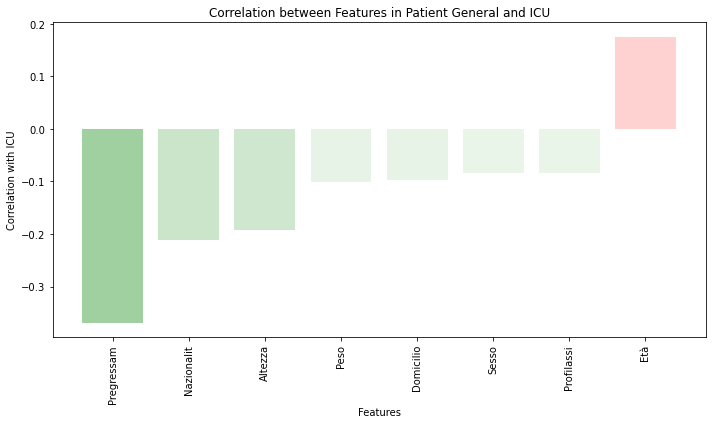

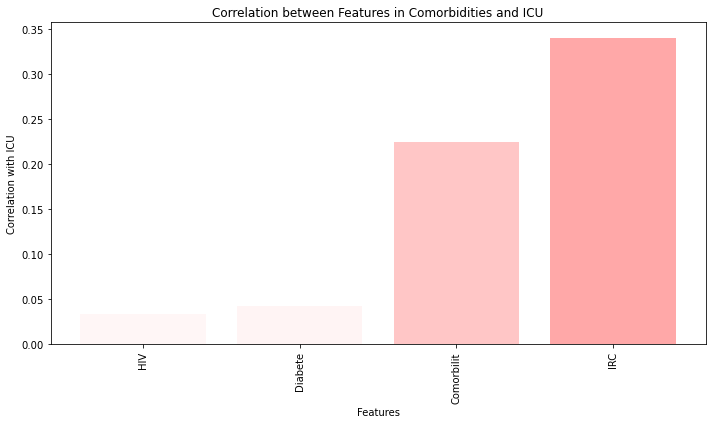

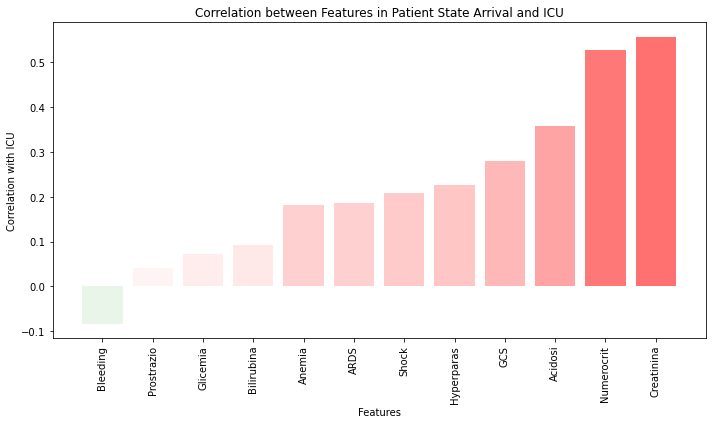

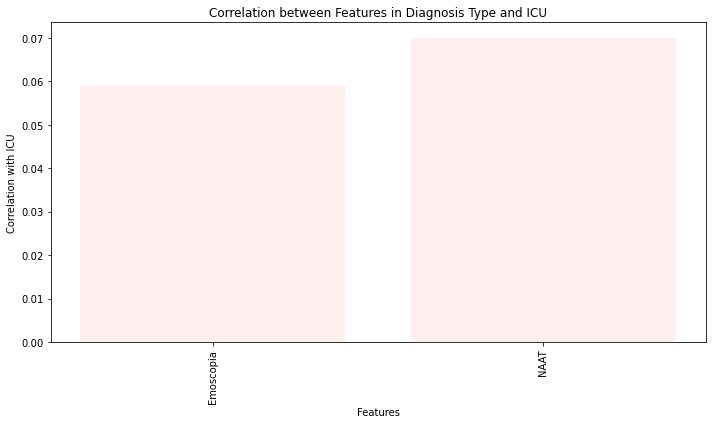

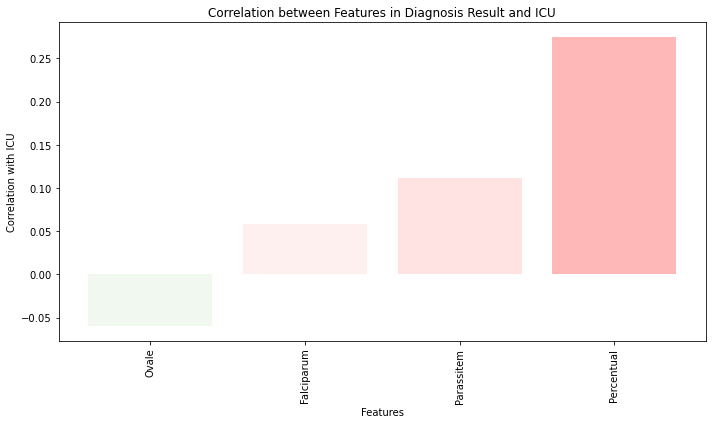

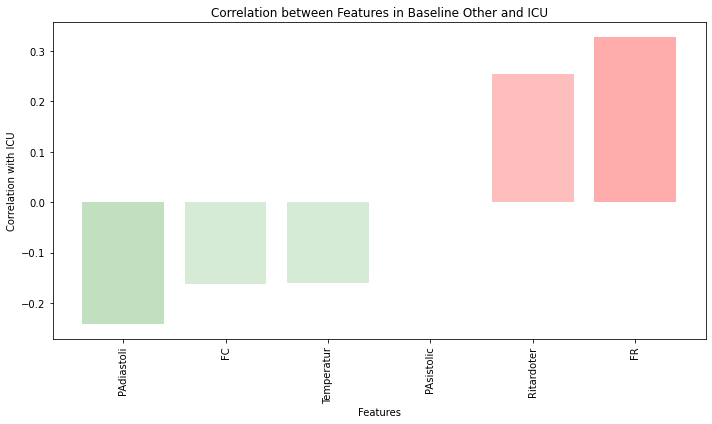

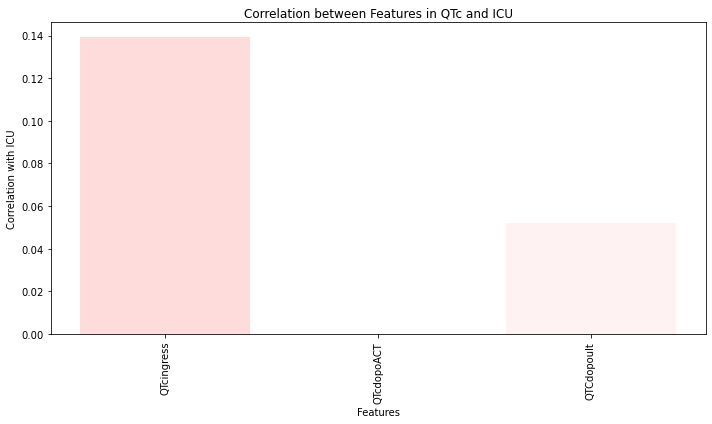

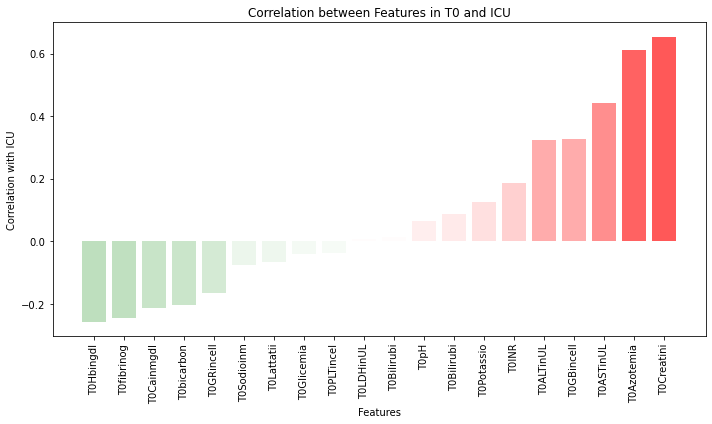

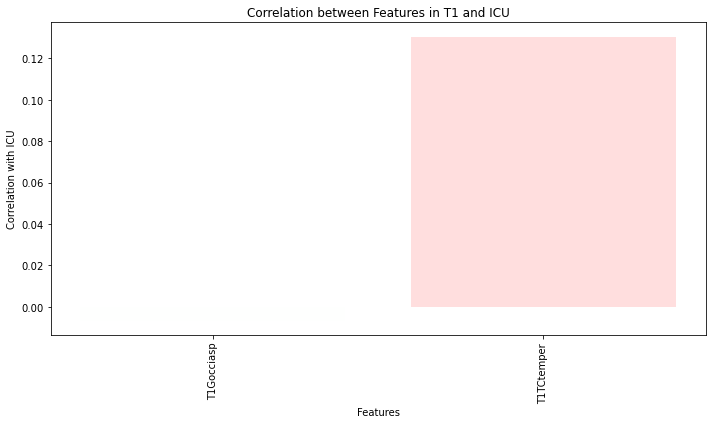

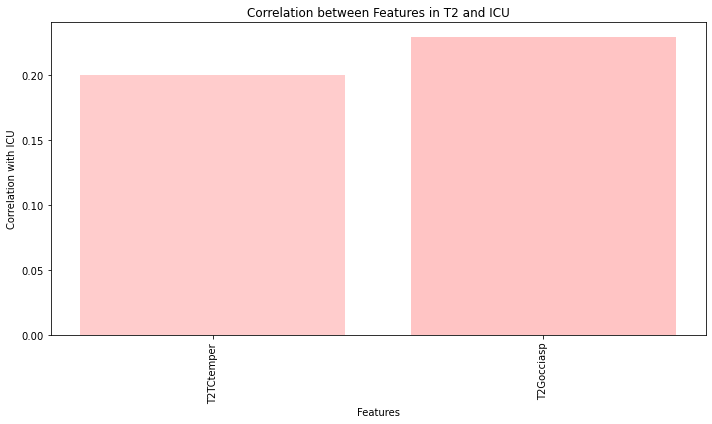

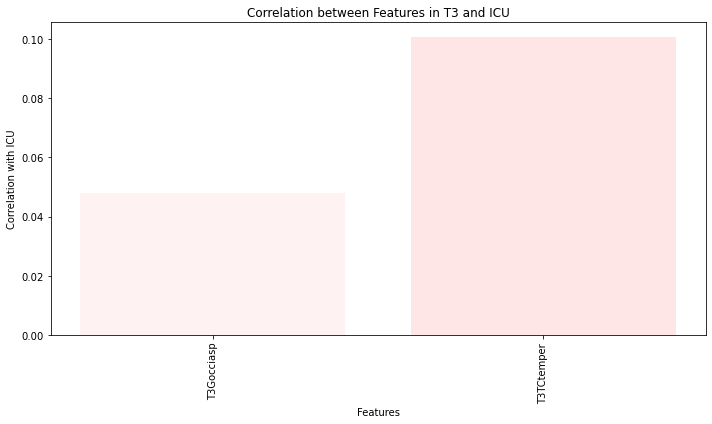

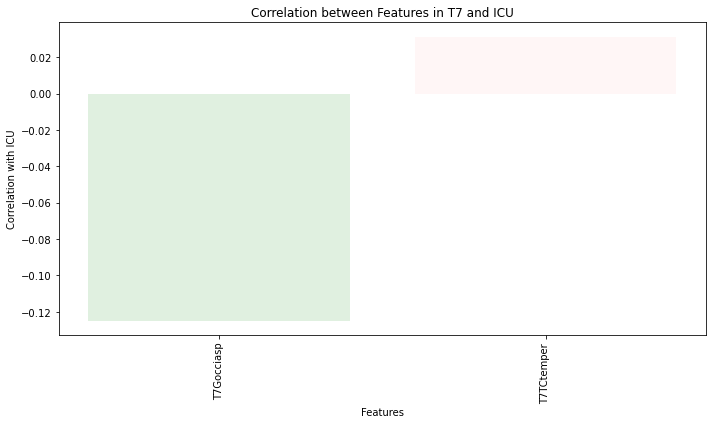

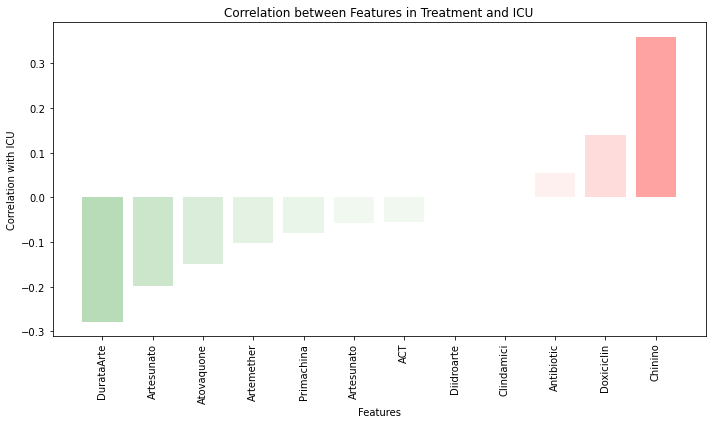

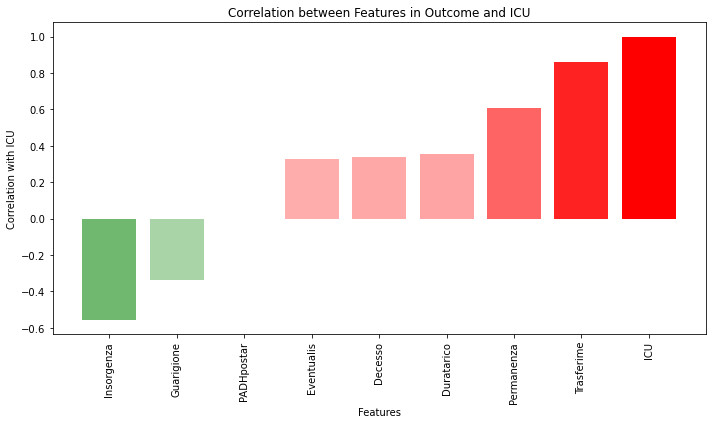

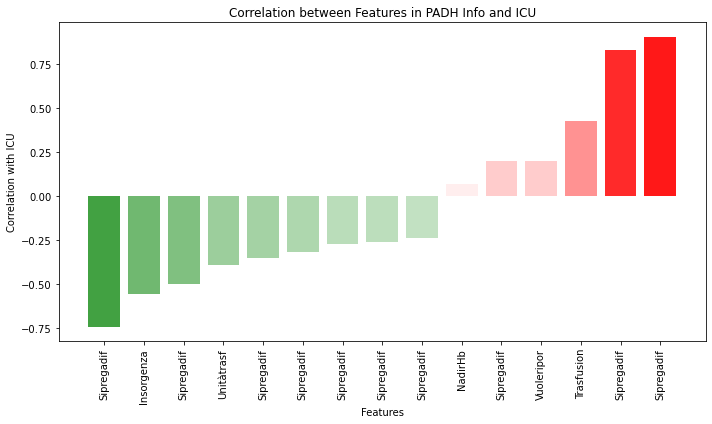

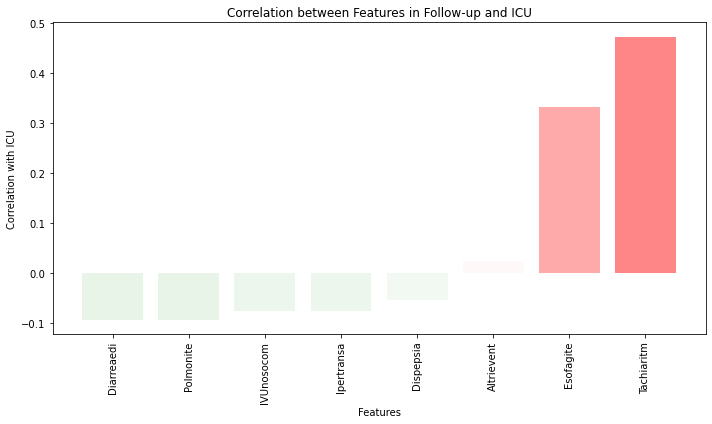

In [218]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

# Define the category lists
categories = [patient_general, comorbidities, patient_state_arrival, diagnosis_type, diagnosis_result, baseline_other, QTc, T0, T1, T2, T3, T7, treatment, outcome, PADH_info, follow_up]
category_names = ['Patient General', 'Comorbidities', 'Patient State Arrival', 'Diagnosis Type', 'Diagnosis Result', 'Baseline Other', 'QTc', 'T0', 'T1', 'T2', 'T3', 'T7', 'Treatment', 'Outcome', 'PADH Info', 'Follow-up']

# Get the 'ICU' column from filtered_df
target_column = filtered_df['ICU']

# Iterate over each category
for category, category_name in zip(categories, category_names):
    # Filter the features based on the current category
    features = [feature for feature in filtered_df.columns if feature in category]

    # Calculate the correlation between each feature and ICU
    correlations = []
    for feature in features:
        if filtered_df[feature].dtype != np.object:  # Check if the feature is not a string
            correlation = filtered_df[feature].corr(target_column)
            correlations.append((feature, correlation))

    # Sort the correlation values in ascending order
    correlations.sort(key=lambda x: x[1])

    # Prepare colors for the bars based on correlation values
    cmap = colors.LinearSegmentedColormap.from_list('correlation_cmap', ['green', 'white', 'red'])
    norm = colors.Normalize(vmin=-1, vmax=1)

    # Plot the correlation values on a bar chart with colored bars
    plt.figure(figsize=(10, 6))
    features, correlation_values = zip(*correlations)
    bar_colors = cmap(norm(correlation_values))
    plt.bar(features, correlation_values, color=bar_colors)
    plt.xlabel('Features')
    plt.ylabel('Correlation with ICU')
    plt.title(f'Correlation between Features in {category_name} and ICU')
    plt.xticks(rotation=90)
    plt.gca().set_xticklabels([label[:10] for label in features])  # Display only the first 10 characters of the labels
    plt.tight_layout()
    plt.show()


**Data Filling**

In [219]:
import numpy as np

# Create a new dataframe to store the results
feature_info = pd.DataFrame(columns=['feature', 'type', 'mean', 'variance'])

# Iterate over the columns in the filtered dataframe
for column in filtered_df.columns:
    col_data = filtered_df[column]
    col_type = ''
    col_mean = ''
    col_var_entropy = ''
    
    # Check if the column has string values
    if col_data.dtype == object:
        col_type = 'string'
    elif set(col_data.dropna().unique()) == {0, 1}:
        col_type = 'categorical'
        col_mean = col_data.mean()
        # col_var_entropy = np.nans
    elif col_data.dtype == np.int64 or all(pd.isnull(val) or val.is_integer() for val in col_data.dropna().unique()):
        col_type = 'int'
        col_mean = col_data.mean()
        col_var_entropy = col_data.var()
    elif col_data.dtype == np.float64 or any('.' in str(val) for val in col_data.dropna().unique()):
        col_type = 'float'
        col_mean = col_data.mean()
        col_var_entropy = col_data.var()
    else:
        col_type = 'unknown'

    # Add the results to the new dataframe
    feature_info = feature_info.append({'feature': column, 'type': col_type, 'mean': col_mean, 'variance': col_var_entropy},
                                       ignore_index=True)

# Print the resulting dataframe
print(feature_info)


                           feature         type       mean    variance
0             Codiceidentificativo       string                       
1                            Sesso  categorical   0.652778            
2                      Nazionalità  categorical   0.569444            
3                              Età          int  50.819444  231.530321
4                        Domicilio  categorical   0.045455            
..                             ...          ...        ...         ...
106                      Polmonite  categorical   0.051724            
107                 IVUnosocomiale  categorical   0.034483            
108                      Esofagite  categorical   0.017241            
109                      Dispepsia  categorical   0.017241            
110  Tachiaritmiasopraventricolare  categorical   0.034483            

[111 rows x 4 columns]


In [220]:
feature_info.head(10)

,feature,type,mean,variance
0,Codiceidentificativo,string,,
1,Sesso,categorical,0.652778,
2,Nazionalità,categorical,0.569444,
3,Età,int,50.819444,231.530321
4,Domicilio,categorical,0.045455,
5,Comorbilità,categorical,0.486111,
6,Diabete,categorical,0.180556,
7,HIV,categorical,0.055556,
8,IRC,categorical,0.055556,
9,Ritardoterapeutico,int,4.833333,9.768362


In [221]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Define the data types for imputation
data_types = {
    'categorical': np.int64,  # Categorical data type
    'int': np.int64,          # Integer data type
    'float': np.float64       # Float data type
}

# Identify the missing values in filtered_df
missing_values = filtered_df.isnull().sum()

# Separate features based on their data types
categorical_features = feature_info[feature_info['type'] == 'categorical']['feature'].tolist()
int_features = feature_info[feature_info['type'] == 'int']['feature'].tolist()
float_features = feature_info[feature_info['type'] == 'float']['feature'].tolist()

# Impute missing values for each data type
for data_type, features in [('categorical', categorical_features), ('int', int_features), ('float', float_features)]:
    # Filter features based on data type
    features_to_impute = [feature for feature in features if feature in missing_values.index and missing_values[feature] > 0]

    if len(features_to_impute) > 0:
        # Prepare the imputation array
        impute_array = filtered_df[features_to_impute].values

        if data_type in ['categorical', 'int']:
            # Perform imputation for 'categorical' and 'int' features using median strategy
            imputer = KNNImputer(n_neighbors=5, weights='distance')
            imputed_values = imputer.fit_transform(impute_array)
            filtered_df.loc[:, features_to_impute] = np.round(imputed_values).astype(data_types[data_type])
        elif data_type == 'float':
            # Perform imputation for 'float' features using mean strategy
            imputer = KNNImputer(n_neighbors=5, weights='distance')
            imputed_values = imputer.fit_transform(impute_array)
            filtered_df.loc[:, features_to_impute] = imputed_values

# Verify if any missing values remain in the DataFrame
missing_values_after_imputation = filtered_df.isnull().sum()
missing_values_to_print = missing_values_after_imputation[missing_values_after_imputation != 0]
if not missing_values_to_print.empty:
    print(f"There are still missing values in the DataFrame after imputation:\n{missing_values_to_print}")
else:
    print("All missing values have been imputed successfully.")


All missing values have been imputed successfully.


c:\Users\balth\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\Users\balth\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\Users\balth\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [222]:
filtered_df.head(5)

# Values to check are column NAAT, the 2 first values of "Parassitemia.." and the 7th value of "Percentual.."

,Codiceidentificativo,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,IRC,Ritardoterapeutico,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Emoscopia,NAAT,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Pregressamalaria,Profilassi,PAsistolica,PAdiastolica,FC,FR,Altezza,Peso,Temperatura,QTcingresso,QTcdopoACT,QTCdopoultimasomministrazioneartesunato,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,T1Gocciaspessaestriscioperiferico,T1TCtemperaturacorporeainC,T2Gocciaspessaestriscioperiferico,T2TCtemperaturacorporeainC,T3Gocciaspessaestriscioperiferico,T3TCtemperaturacorporeainC,T7Gocciaspessaestriscioperiferico,T7TCtemperaturacorporeainC,ArtesunatoevSomministrazione1Datainizioeora,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato,PermanenzainTerapiaIntensivagiorni,TrasferimentoinRianimazioneancheinaltrocentro,Guarigione,Durataricovero,Decesso,ICU,Eventualisequele,PADHpostartesunatedelayedhaemoly1s,InsorgenzaPADH,SipregadiforniretuttiiparamerivitaliGBincellul,SipregadiforniretuttiiparamerivitaliHbingdl,SipregadiforniretuttiiparamerivitaliPLTincellul,Sipregadiforniretuttiiparamerivitalireticolitiincellul,SipregadiforniretuttiiparamerivitaliLDHinUllcio,SipregadiforniretuttiiparamerivitaliASTUL,SipregadiforniretuttiiparamerivitaliALTUL,SipregadiforniretuttiiparamerivitaliBilirubinatotmgdl,SipregadiforniretuttiiparamerivitaliBilirubinadirettamgdl,SipregadiforniretuttiiparamerivitalitestdiCoombsdiretto,Vuoleriportareulterioriinformazionirelativeaiprelievieffettuatidurantelevisiteintermediefinoallarisoluzionedellemolisi,NadirHb,Trasfusione,Unitàtrasfuse,Altrieventiavversi,Diarreaedisidratazione,Ipertransaminasemiatardiva,Polmonite,IVUnosocomiale,Esofagite,Dispepsia,Tachiaritmiasopraventricolare
0,3761,1,1,57,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,117137,1.0,0,0,110,60,65,14,160,55.0,37.8,401,446,441,4890,4210000,11.4,132000,99.0,29.000000,0.94,338,31,33,1.08,0.475355,136,3.4,8.400000,1.15,498,7.488156,29.354149,1.961553,1,36.8,1,36.800000,1,36.900000,0,36.250497,0,0,0,0,0,1,0,0,0,0,0,2,0,0,1,4,0,0,0,0,11,7473,8.658614,221779,317786,2696,52,37,2.305597,0.723713,0,1,6.508625,0,6,0,0,0,0,0,0,0,0
1,35319,0,0,62,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,37694,1.0,0,0,140,90,124,14,159,70.0,38.5,364,407,407,5240,4980000,14.2,165000,104.0,40.000000,1.00,260,31,39,0.82,0.779619,140,3.9,9.400000,1.19,469,7.471427,29.661985,2.386043,1,37.5,1,37.409134,1,37.200000,0,36.689978,0,0,0,0,0,1,0,0,0,0,0,4,0,0,1,15,0,0,0,0,12,9494,8.769722,248947,144164,1010,45,41,2.441647,0.756944,0,1,6.520012,0,3,1,1,0,0,0,0,0,0
2,BS01,1,0,72,0,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,7,0.2,1,0,80,60,87,20,175,83.0,39.0,420,412,430,6000,3010000,9.4,123000,107.0,38.000000,0.91,474,18,18,1.75,0.360000,139,4.0,8.130000,1.10,369,7.410000,30.400000,2.600000,1,37.5,1,37.300000,0,37.000000,0,37.000000,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,5,0,0,0,0,9,5672,8.564969,119810,249584,883,53,47,2.400674,0.749121,0,1,6.574113,0,3,0,0,0,0,0,0,0,0
3,BS-004,1,0,53,0,1,1,0,0,7,0,0,0,0,0,0,1,0,0,0,1,2,1,1,1,0,572000,12.0,0,0,125,85,105,20,177,96.0,40.4,450,458,443,7040,4770000,14.4,19000,230.0,52.200296,3.22,357,35,80,1.94,1.020000,122,3.5,8.520905,1.10,407,7.459404,25.057969,2.728105,1,39.0,0,36.500000,1,36.580389,0,36.252816,1,0,1,1,1,0,0,0,0,0,0,4,0,0,1,5,0,0,0,1,19,8550,7.800000,249000,241784,1098,35,27,2.064907,0.723337,0,1,7.800000,0,4,0,0,0,0,0,0,0,0
4,BS-005,0,1,58,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,602100,13.5,0,0,107,40,125,16,160,64.3,40.0,451,435,409,2810,4

In [223]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select int and float features to normalize
numeric_features = feature_info[feature_info['type'].isin(['int', 'float'])]['feature'].tolist()

# Normalize numeric features
scaler = StandardScaler()  # or scaler = MinMaxScaler() for min-max normalization
# filtered_df[numeric_features] = scaler.fit_transform(filtered_df[numeric_features])


In [224]:
filtered_df.head(5)

,Codiceidentificativo,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,IRC,Ritardoterapeutico,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Emoscopia,NAAT,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Pregressamalaria,Profilassi,PAsistolica,PAdiastolica,FC,FR,Altezza,Peso,Temperatura,QTcingresso,QTcdopoACT,QTCdopoultimasomministrazioneartesunato,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,T1Gocciaspessaestriscioperiferico,T1TCtemperaturacorporeainC,T2Gocciaspessaestriscioperiferico,T2TCtemperaturacorporeainC,T3Gocciaspessaestriscioperiferico,T3TCtemperaturacorporeainC,T7Gocciaspessaestriscioperiferico,T7TCtemperaturacorporeainC,ArtesunatoevSomministrazione1Datainizioeora,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato,PermanenzainTerapiaIntensivagiorni,TrasferimentoinRianimazioneancheinaltrocentro,Guarigione,Durataricovero,Decesso,ICU,Eventualisequele,PADHpostartesunatedelayedhaemoly1s,InsorgenzaPADH,SipregadiforniretuttiiparamerivitaliGBincellul,SipregadiforniretuttiiparamerivitaliHbingdl,SipregadiforniretuttiiparamerivitaliPLTincellul,Sipregadiforniretuttiiparamerivitalireticolitiincellul,SipregadiforniretuttiiparamerivitaliLDHinUllcio,SipregadiforniretuttiiparamerivitaliASTUL,SipregadiforniretuttiiparamerivitaliALTUL,SipregadiforniretuttiiparamerivitaliBilirubinatotmgdl,SipregadiforniretuttiiparamerivitaliBilirubinadirettamgdl,SipregadiforniretuttiiparamerivitalitestdiCoombsdiretto,Vuoleriportareulterioriinformazionirelativeaiprelievieffettuatidurantelevisiteintermediefinoallarisoluzionedellemolisi,NadirHb,Trasfusione,Unitàtrasfuse,Altrieventiavversi,Diarreaedisidratazione,Ipertransaminasemiatardiva,Polmonite,IVUnosocomiale,Esofagite,Dispepsia,Tachiaritmiasopraventricolare
0,3761,1,1,57,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,117137,1.0,0,0,110,60,65,14,160,55.0,37.8,401,446,441,4890,4210000,11.4,132000,99.0,29.000000,0.94,338,31,33,1.08,0.475355,136,3.4,8.400000,1.15,498,7.488156,29.354149,1.961553,1,36.8,1,36.800000,1,36.900000,0,36.250497,0,0,0,0,0,1,0,0,0,0,0,2,0,0,1,4,0,0,0,0,11,7473,8.658614,221779,317786,2696,52,37,2.305597,0.723713,0,1,6.508625,0,6,0,0,0,0,0,0,0,0
1,35319,0,0,62,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,37694,1.0,0,0,140,90,124,14,159,70.0,38.5,364,407,407,5240,4980000,14.2,165000,104.0,40.000000,1.00,260,31,39,0.82,0.779619,140,3.9,9.400000,1.19,469,7.471427,29.661985,2.386043,1,37.5,1,37.409134,1,37.200000,0,36.689978,0,0,0,0,0,1,0,0,0,0,0,4,0,0,1,15,0,0,0,0,12,9494,8.769722,248947,144164,1010,45,41,2.441647,0.756944,0,1,6.520012,0,3,1,1,0,0,0,0,0,0
2,BS01,1,0,72,0,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,7,0.2,1,0,80,60,87,20,175,83.0,39.0,420,412,430,6000,3010000,9.4,123000,107.0,38.000000,0.91,474,18,18,1.75,0.360000,139,4.0,8.130000,1.10,369,7.410000,30.400000,2.600000,1,37.5,1,37.300000,0,37.000000,0,37.000000,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,5,0,0,0,0,9,5672,8.564969,119810,249584,883,53,47,2.400674,0.749121,0,1,6.574113,0,3,0,0,0,0,0,0,0,0
3,BS-004,1,0,53,0,1,1,0,0,7,0,0,0,0,0,0,1,0,0,0,1,2,1,1,1,0,572000,12.0,0,0,125,85,105,20,177,96.0,40.4,450,458,443,7040,4770000,14.4,19000,230.0,52.200296,3.22,357,35,80,1.94,1.020000,122,3.5,8.520905,1.10,407,7.459404,25.057969,2.728105,1,39.0,0,36.500000,1,36.580389,0,36.252816,1,0,1,1,1,0,0,0,0,0,0,4,0,0,1,5,0,0,0,1,19,8550,7.800000,249000,241784,1098,35,27,2.064907,0.723337,0,1,7.800000,0,4,0,0,0,0,0,0,0,0
4,BS-005,0,1,58,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,602100,13.5,0,0,107,40,125,16,160,64.3,40.0,451,435,409,2810,4

**Distance computing**

At this point we should start thinking about the embedding of the data because for now all features have the same weight on the distances. 

We will work on this problem in a separated file and come back to this later on. 

For now lets just make a dummy model that uses all the features without weighting them. But we need to keep only the features that provide baseline informations of the patient. Features of category "T3" (3 days after comming at the hospital), "outcome" or "follow-up info" would obviously introduce bias in our model and not provide any usefull infromation. 

In [225]:
# From now on we will drop the "Codice identificativo" because it's string data with no info.
# So we make an updated version of Patient_general for prediciton
patient_general_noID = ['Sesso', 'Nazionalità', 'Età', 'Domicilio','Altezza','Peso', 'Sub-Saharan Africa', 'Pregressa malaria', 'Profilassi']

# And we will only keep the features that do not introduce "bias" in our graphe
predictive_categories = [patient_general_noID, comorbidities, patient_state_arrival, diagnosis_result, baseline_other, T0, treatment]

In [226]:
# Create an empty list to store selected feature names
selected_features = []

# Iterate over predictive_categories
for category in predictive_categories:
    # Check if any column in filtered_df is present in the current category
    selected_features.extend([feature for feature in filtered_df.columns if feature in category])

# Create predictive_df DataFrame with selected features
predictive_df = filtered_df[selected_features]


In [227]:
correlations = []

# Iterate over selected features
for feature in selected_features:
    # Calculate correlation between the selected feature and "ICU"
    correlation = filtered_df[feature].corr(filtered_df["ICU"])
    correlations.append((feature, correlation))

# Sort the correlations in descending order based on absolute values
correlations.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the feature/correlation pairs
for feature, correlation in correlations:
    print(f"Feature: {feature}, Correlation with ICU: {correlation}")


Feature: T0Creatininainmgdl, Correlation with ICU: 0.6458940618545059
Feature: T0Azotemiainmgdl, Correlation with ICU: 0.5724413790195405
Feature: Creatinina, Correlation with ICU: 0.5570860145311552
Feature: Numerocriteri, Correlation with ICU: 0.527859873989506
Feature: Chinino, Correlation with ICU: 0.35975311233691193
Feature: Acidosi, Correlation with ICU: 0.3404532748240984
Feature: IRC, Correlation with ICU: 0.3404532748240983
Feature: T0ASTinUL, Correlation with ICU: 0.3228568358969588
Feature: T0GBincellul, Correlation with ICU: 0.3142434059421723
Feature: T0ALTinUL, Correlation with ICU: 0.30398554744936324
Feature: Percentualeparassitemia, Correlation with ICU: 0.2814392549215956
Feature: GCS, Correlation with ICU: 0.2799319295034123
Feature: T0Hbingdl, Correlation with ICU: -0.26450047671344146
Feature: Ritardoterapeutico, Correlation with ICU: 0.22680886240643636
Feature: Hyperparasitaemia, Correlation with ICU: 0.2255507656658139
Feature: Comorbilità, Correlation with ICU

In [228]:
# predictive_df = predictive_df[['T0Creatininainmgdl', 'T0Azotemiainmgdl']]

# Assuming your original dataframe is called 'predictive_df'

# Filter the dataframe for male patients (Sesso = 0)
male_df = predictive_df[predictive_df['Sesso'] == 0][['T0Creatininainmgdl', 'T0Azotemiainmgdl']]

# Filter the dataframe for female patients (Sesso = 1)
female_df = predictive_df[predictive_df['Sesso'] == 1][['T0Creatininainmgdl', 'T0Azotemiainmgdl']]

# Print the male dataframe
print("Male DataFrame:")
print(male_df.head())

# Print the female dataframe
print("\nFemale DataFrame:")
print(female_df.head())


Male DataFrame:
    T0Creatininainmgdl  T0Azotemiainmgdl
1                 1.00              40.0
4                 1.30              48.0
6                 1.22              74.0
13                0.90              32.0
14                1.07              31.0

Female DataFrame:
   T0Creatininainmgdl  T0Azotemiainmgdl
0                0.94         29.000000
2                0.91         38.000000
3                3.22         52.200296
5                6.60        392.000000
7                0.91         38.000000


In [229]:
predictive_df.head(10)

,Sesso,Nazionalità,Età,Domicilio,Profilassi,Altezza,Peso,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,PAsistolica,PAdiastolica,FC,FR,Temperatura,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,ArtesunatoevSomministrazione1Datainizioeora,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato
0,1,1,57,0,0,160,55.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,117137,1.00000,7,110,60,65,14,37.8,4890,4210000,11.4,132000,99.0,29.000000,0.94,338,31,33,1.08,0.475355,136,3.4,8.400000,1.15,498,7.488156,29.354149,1.961553,0,0,0,0,0,1,0,0,0,0,0,2
1,0,0,62,0,0,159,70.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,37694,1.00000,7,140,90,124,14,38.5,5240,4980000,14.2,165000,104.0,40.000000,1.00,260,31,39,0.82,0.779619,140,3.9,9.400000,1.19,469,7.471427,29.661985,2.386043,0,0,0,0,0,1,0,0,0,0,0,4
2,1,0,72,0,0,175,83.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,7,0.20000,2,80,60,87,20,39.0,6000,3010000,9.4,123000,107.0,38.000000,0.91,474,18,18,1.75,0.360000,139,4.0,8.130000,1.10,369,7.410000,30.400000,2.600000,1,0,1,1,1,0,0,0,0,0,0,1
3,1,0,53,0,0,177,96.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,1,0,572000,12.00000,7,125,85,105,20,40.4,7040,4770000,14.4,19000,230.0,52.200296,3.22,357,35,80,1.94,1.020000,122,3.5,8.520905,1.10,407,7.459404,25.057969,2.728105,1,0,1,1,1,0,0,0,0,0,0,4
4,0,1,58,0,0,160,64.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,602100,13.50000,7,107,40,125,16,40.0,2810,4460,14.5,58000,115.0,48.000000,1.30,858,38,37,1.48,1.428358,135,3.9,8.849885,1.10,455,7.460937,26.638637,2.363897,1,0,1,1,1,0,0,0,0,0,0,1
5,1,0,60,0,0,169,75.0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,5,1,0,110000,2.70000,2,75,40,80,22,36.7,12580,3190000,9.2,33000,131.0,392.000000,6.60,702,98,78,3.70,2.700000,140,3.0,6.700000,1.24,317,7.430000,23.900000,1.300000,1,0,1,1,1,0,1,0,1,0,0,2
6,0,0,83,0,0,165,75.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,119139,6.97213,2,120,80,85,14,38.5,7780,4230000,12.0,139000,129.0,74.000000,1.22,350,38,21,0.98,2.189333,139,3.8,8.500000,1.13,496,7.434130,22.788572,2.831364,0,0,0,0,0,1,0,0,0,0,0,2
7,1,0,72,0,0,175,83.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,67000,2.00000,2,78,46,87,21,39.0,6000,3010000,9.4,123000,107.0,38.000000,0.91,474,18,18,1.75,0.360000,139,4.0,8.130000,1.10,369,7.410000,30.400000,2.600000,1,0,1,1,1,0,0,0,0,0,0,1
8,1,1,64,0,0,177,70.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,22049,1.00000,6,100,65,65,14,38.5,2960,5150000,12.3,97000,81.0,22.662156,1.00,685,48,43,1.32,1.545006,135,4.2,8.817732,1.33,418,7.481551,28.112667,1.366779,0,0,0,0,0,1,0,0,0,0,0,4
9,1,0,35,0,0,182,78.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,142,0.10000,2,110,70,70,14,39.0,6400,4750000,16.5,166000,123.0,35.000000,0.90,596,17,32,0.60,0.200000,137,4.4,9.500000,0.89,332,7.410000,25.000000,2.328629,0,0,1,1,1,0,0,0,1,0,0,4


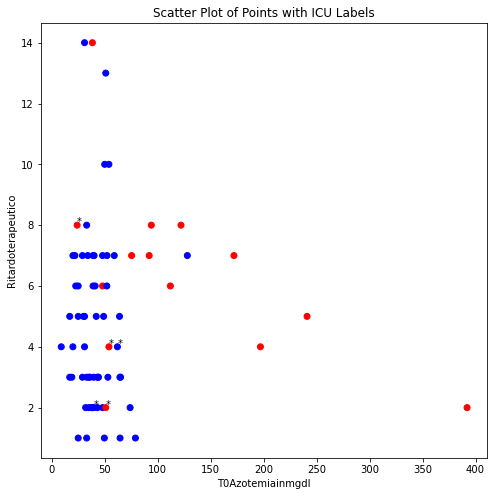

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your DataFrame with the points is called 'predictive_df'
# Assuming the filtered DataFrame with the ICU labels is called 'filtered_df'

# Step 1: Extract the two features from predictive_df
feature1 = predictive_df['T0Azotemiainmgdl']
feature2 = predictive_df['Ritardoterapeutico']

# Step 2: Extract the ICU labels from filtered_df
icu_labels = filtered_df['ICU']

# Step 3: Extract the GCS feature from predictive_df
gcs_feature = predictive_df['GCS']

# Step 4: Map the ICU labels to colors
colors = ['red' if label == 1 else 'blue' for label in icu_labels]

# Step 5: Create the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(feature1, feature2, c=colors)

# Step 6: Add labels and title
plt.xlabel('T0Azotemiainmgdl')
plt.ylabel('Ritardoterapeutico')
plt.title('Scatter Plot of Points with ICU Labels')

for i, txt in enumerate(predictive_df.index):
    if gcs_feature[i] == 1:
        plt.annotate('*', (feature1[i], feature2[i]), fontsize=10)
   


# Step 7: Show the plot
plt.show()


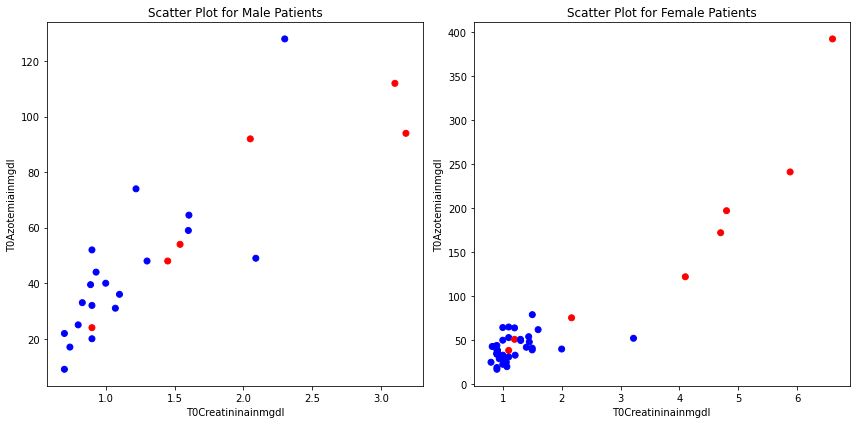

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your DataFrame with the points is called 'predictive_df'
# Assuming the filtered DataFrame with the ICU labels is called 'filtered_df'

# Step 1: Extract the two features from predictive_df for male and female dataframes
male_feature1 = male_df['T0Creatininainmgdl']
male_feature2 = male_df['T0Azotemiainmgdl']

female_feature1 = female_df['T0Creatininainmgdl']
female_feature2 = female_df['T0Azotemiainmgdl']

# Step 2: Extract the ICU labels from filtered_df for male and female dataframes
male_icu_labels = filtered_df[filtered_df['Sesso'] == 0]['ICU']
female_icu_labels = filtered_df[filtered_df['Sesso'] == 1]['ICU']

# Step 3: Map the ICU labels to colors for male and female dataframes
male_colors = ['red' if label == 1 else 'blue' for label in male_icu_labels]
female_colors = ['red' if label == 1 else 'blue' for label in female_icu_labels]

# Step 4: Create the scatter plots for male and female dataframes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(male_feature1, male_feature2, c=male_colors)
plt.xlabel('T0Creatininainmgdl')
plt.ylabel('T0Azotemiainmgdl')
plt.title('Scatter Plot for Male Patients')

plt.subplot(1, 2, 2)
plt.scatter(female_feature1, female_feature2, c=female_colors)
plt.xlabel('T0Creatininainmgdl')
plt.ylabel('T0Azotemiainmgdl')
plt.title('Scatter Plot for Female Patients')

# Step 5: Adjust spacing between subplots
plt.tight_layout()

# Step 6: Show the plot
plt.show()


In [232]:
# Convert correlations list to a dictionary
correlations_dict = dict(correlations)

# Compute weighted distance between two samples in the DataFrame
def compute_weighted_distance(df, index1, index2, correlations):
    sample1 = df.iloc[index1].values
    sample2 = df.iloc[index2].values
    weighted_distance = 0
    
    for i in range(len(sample1)):
        feature = df.columns[i]
        correlation = correlations[feature]
        weighted_distance += abs(correlation) * (sample1[i] - sample2[i]) ** 2
    
    return np.sqrt(weighted_distance)



In [233]:
# Example distances between sample pairs
distance_1 = compute_weighted_distance(predictive_df, 0, 1, correlations_dict)
distance_2 = compute_weighted_distance(predictive_df, 2, 3, correlations_dict)
distance_3 = compute_weighted_distance(predictive_df, 4, 5, correlations_dict)

print("Distance between sample 0 and sample 1:", distance_1)
print("Distance between sample 2 and sample 3:", distance_2)
print("Distance between sample 4 and sample 5:", distance_3)


Distance between sample 0 and sample 1: 296058.61304802174
Distance between sample 2 and sample 3: 718325.4073323006
Distance between sample 4 and sample 5: 1235425.1114389447


In [234]:
predictive_df.head(10)

,Sesso,Nazionalità,Età,Domicilio,Profilassi,Altezza,Peso,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,PAsistolica,PAdiastolica,FC,FR,Temperatura,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,ArtesunatoevSomministrazione1Datainizioeora,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato
0,1,1,57,0,0,160,55.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,117137,1.00000,7,110,60,65,14,37.8,4890,4210000,11.4,132000,99.0,29.000000,0.94,338,31,33,1.08,0.475355,136,3.4,8.400000,1.15,498,7.488156,29.354149,1.961553,0,0,0,0,0,1,0,0,0,0,0,2
1,0,0,62,0,0,159,70.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,37694,1.00000,7,140,90,124,14,38.5,5240,4980000,14.2,165000,104.0,40.000000,1.00,260,31,39,0.82,0.779619,140,3.9,9.400000,1.19,469,7.471427,29.661985,2.386043,0,0,0,0,0,1,0,0,0,0,0,4
2,1,0,72,0,0,175,83.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,7,0.20000,2,80,60,87,20,39.0,6000,3010000,9.4,123000,107.0,38.000000,0.91,474,18,18,1.75,0.360000,139,4.0,8.130000,1.10,369,7.410000,30.400000,2.600000,1,0,1,1,1,0,0,0,0,0,0,1
3,1,0,53,0,0,177,96.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,1,0,572000,12.00000,7,125,85,105,20,40.4,7040,4770000,14.4,19000,230.0,52.200296,3.22,357,35,80,1.94,1.020000,122,3.5,8.520905,1.10,407,7.459404,25.057969,2.728105,1,0,1,1,1,0,0,0,0,0,0,4
4,0,1,58,0,0,160,64.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,602100,13.50000,7,107,40,125,16,40.0,2810,4460,14.5,58000,115.0,48.000000,1.30,858,38,37,1.48,1.428358,135,3.9,8.849885,1.10,455,7.460937,26.638637,2.363897,1,0,1,1,1,0,0,0,0,0,0,1
5,1,0,60,0,0,169,75.0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,5,1,0,110000,2.70000,2,75,40,80,22,36.7,12580,3190000,9.2,33000,131.0,392.000000,6.60,702,98,78,3.70,2.700000,140,3.0,6.700000,1.24,317,7.430000,23.900000,1.300000,1,0,1,1,1,0,1,0,1,0,0,2
6,0,0,83,0,0,165,75.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,119139,6.97213,2,120,80,85,14,38.5,7780,4230000,12.0,139000,129.0,74.000000,1.22,350,38,21,0.98,2.189333,139,3.8,8.500000,1.13,496,7.434130,22.788572,2.831364,0,0,0,0,0,1,0,0,0,0,0,2
7,1,0,72,0,0,175,83.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,67000,2.00000,2,78,46,87,21,39.0,6000,3010000,9.4,123000,107.0,38.000000,0.91,474,18,18,1.75,0.360000,139,4.0,8.130000,1.10,369,7.410000,30.400000,2.600000,1,0,1,1,1,0,0,0,0,0,0,1
8,1,1,64,0,0,177,70.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,22049,1.00000,6,100,65,65,14,38.5,2960,5150000,12.3,97000,81.0,22.662156,1.00,685,48,43,1.32,1.545006,135,4.2,8.817732,1.33,418,7.481551,28.112667,1.366779,0,0,0,0,0,1,0,0,0,0,0,4
9,1,0,35,0,0,182,78.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,142,0.10000,2,110,70,70,14,39.0,6400,4750000,16.5,166000,123.0,35.000000,0.90,596,17,32,0.60,0.200000,137,4.4,9.500000,0.89,332,7.410000,25.000000,2.328629,0,0,1,1,1,0,0,0,1,0,0,4


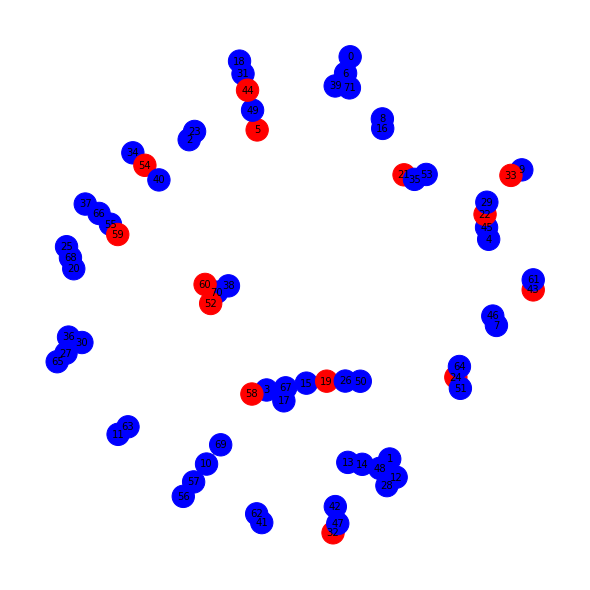

In [235]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
# Assuming the filtered dataset with the "ICU" feature is stored in a DataFrame called 'filtered_df'
# Assuming the correlations are stored in a dictionary called 'correlations_dict'

# Compute weighted distance between two samples in the DataFrame
def compute_weighted_distance(df, index1, index2, correlations):
    sample1 = df.iloc[index1].values
    sample2 = df.iloc[index2].values
    weighted_distance = 0
    
    for i in range(len(sample1)):
        feature = df.columns[i]
        correlation = correlations[feature]
        weighted_distance += abs(correlation) * (sample1[i] - sample2[i]) ** 2
    
    return np.sqrt(weighted_distance)

# Step 1: Find pairwise weighted distances
dist_matrix = np.zeros((predictive_df.shape[0], predictive_df.shape[0]))

for i in range(predictive_df.shape[0]):
    for j in range(i + 1, predictive_df.shape[0]):
        weighted_dist = compute_weighted_distance(predictive_df, i, j, correlations_dict)
        dist_matrix[i, j] = weighted_dist
        dist_matrix[j, i] = weighted_dist

# Check distances set to 0 outside diagonal
for i in range(dist_matrix.shape[0]):
    for j in range(dist_matrix.shape[1]):
        if i != j and dist_matrix[i, j] == 0:
            print(f"Distance between points {i} and {j} is set to 0.")


# Step 2: Find three nearest neighbors for each sample
k = 1  # Number of nearest neighbors
nearest_neighbors = np.argsort(dist_matrix, axis=1)[:, 0:k+1]

# print(nearest_neighbors)

# Step 3: Create graph and add edges
graph = nx.Graph()
for i, neighbors in enumerate(nearest_neighbors):
    for neighbor in neighbors:
        if neighbor != i :
            graph.add_edge(i, neighbor)

# Step 4: Add nodes with color based on 'ICU' feature
for i in range(filtered_df.shape[0]):
    icu_value = filtered_df.iloc[i]['ICU']
    color = 'red' if icu_value == 1 else 'blue'
    graph.add_node(i, color=color)

# Step 5: Plot the graph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(graph)
node_colors = [graph.nodes[node]['color'] for node in graph.nodes]
nx.draw(graph, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, edge_color='gray')
plt.axis("off")
plt.show()


In [236]:
# raise

In [237]:
# Back to our main task

# Compute similarity matrix
similarity_matrix = np.zeros((predictive_df.shape[0], predictive_df.shape[0]))

for i in range(predictive_df.shape[0]):
    for j in range(predictive_df.shape[0]):
        if i != j:  # Exclude self-edges
            distance = compute_weighted_distance(predictive_df, i, j,correlations_dict)
            similarity_matrix[i, j] = 1 / (1 + distance)

# Compute average similarity and standard deviation
average_similarity = np.nanmean(similarity_matrix)
std_similarity = np.nanstd(similarity_matrix)



print("Average Similarity:", average_similarity)
print("Standard Deviation of Similarity:", std_similarity)


Average Similarity: 0.0002674021784081018
Standard Deviation of Similarity: 0.013326536153783545


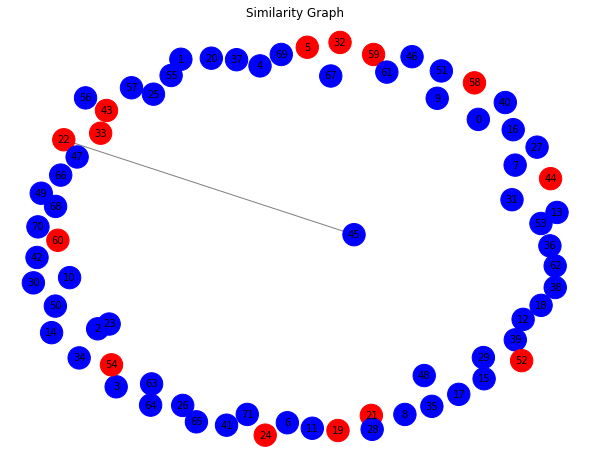

In [238]:
# Apply threshold on similarity matrix
threshold = average_similarity  # default
# threshold = 0.10  # Adjust the threshold as needed
similarity_matrix[similarity_matrix < threshold] = 0

# Create graph from similarity matrix
G = nx.from_numpy_matrix(similarity_matrix)

# Set node colors based on ICU values
node_colors = ['red' if filtered_df['ICU'].iloc[i] == 1 else 'blue' for i in range(filtered_df.shape[0])]

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, edge_color='gray')
plt.title("Similarity Graph")
plt.show()


In [239]:
raise

RuntimeError: No active exception to reraise

In [ ]:
import networkx as nx
from pyvis.network import Network

# Create a graph object
G = nx.Graph()

# Add nodes to the graph
for i in range(predictive_df.shape[0]):
    icu_value = filtered_df.iloc[i]['ICU']
    color = 'red' if icu_value == 1 else 'blue'
    G.add_node(i, color=color)

# Add edges to the graph
for i in range(predictive_df.shape[0]):
    for j in range(i + 1, predictive_df.shape[0]):
        if similarity_matrix[i, j] > 0:
            G.add_edge(i, j)

# Create a pyvis network
nt = Network(notebook=True)



# Add nodes and edges to the network
for node in G.nodes():
    color = G.nodes[node]['color']
    nt.add_node(node, color=color)

for edge in G.edges():
    nt.add_edge(edge[0], edge[1])

# # Display the network
nt.show("graph2.html")


graph2.html


In [ ]:
# import math
# from collections import Counter
# import community as cmnt

# # Compute entropy of a distribution
# def entropy(dist):
#     entropy = 0
#     total = sum(dist.values())
#     for count in dist.values():
#         probability = count / total
#         if probability > 0:
#             entropy -= probability * math.log2(probability)
#     return entropy

# resolution = 0.1

# partition = cmnt.community_louvain.best_partition(G, resolution=resolution)

# # Compute the number of members, entropy, and dominant label for each community
# community_members = Counter(partition.values())
# community_entropies = {}
# community_dominant_labels = {}
# for node, community in partition.items():
#     icu_value = filtered_df.iloc[node]['ICU']
#     if community in community_entropies:
#         community_entropies[community][icu_value] += 1
#     else:
#         community_entropies[community] = Counter()
#         community_entropies[community][icu_value] = 1

#     if community not in community_dominant_labels:
#         community_dominant_labels[community] = []
#     community_dominant_labels[community].append(icu_value)

# # Print the number of members, entropy, and dominant label for each community
# print("Community Information:")
# for community, members in community_members.items():
#     dist = community_entropies[community]
#     community_entropy = entropy(dist)
#     dominant_label = Counter(community_dominant_labels[community]).most_common(1)[0][0]
#     print(f"Community {community}:")
#     print(f"  Members: {members}")
#     print(f"  Entropy: {community_entropy}")
#     print(f"  Dominant Label: {dominant_label}")


Community Information:
Community 2:
  Members: 58
  Entropy: 0.29367630985136955
  Dominant Label: 0
Community 5:
  Members: 1
  Entropy: 0.0
  Dominant Label: 1
Community 7:
  Members: 1
  Entropy: 0.0
  Dominant Label: 1
Community 0:
  Members: 1
  Entropy: 0.0
  Dominant Label: 1
Community 1:
  Members: 2
  Entropy: 0.0
  Dominant Label: 1
Community 4:
  Members: 1
  Entropy: 0.0
  Dominant Label: 0
Community 12:
  Members: 2
  Entropy: 0.0
  Dominant Label: 1
Community 6:
  Members: 1
  Entropy: 0.0
  Dominant Label: 1
Community 8:
  Members: 1
  Entropy: 0.0
  Dominant Label: 0
Community 9:
  Members: 1
  Entropy: 0.0
  Dominant Label: 1
Community 10:
  Members: 1
  Entropy: 0.0
  Dominant Label: 1
Community 11:
  Members: 1
  Entropy: 0.0
  Dominant Label: 1
Community 3:
  Members: 1
  Entropy: 0.0
  Dominant Label: 0


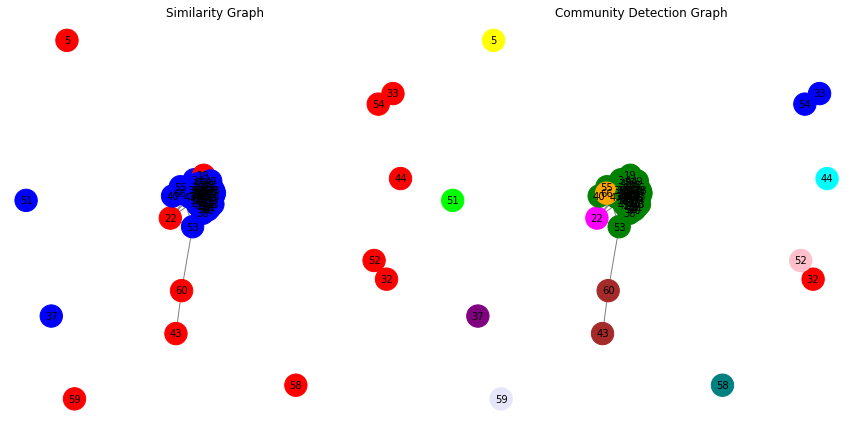

In [ ]:
import math
from collections import Counter
import community as cmnt
import networkx as nx
import matplotlib.pyplot as plt

# Compute entropy of a distribution
def entropy(dist):
    entropy = 0
    total = sum(dist.values())
    for count in dist.values():
        probability = count / total
        if probability > 0:
            entropy -= probability * math.log2(probability)
    return entropy

resolution = 0.1

# Apply threshold on similarity matrix
threshold = average_similarity  # default
# threshold = 0.10  # Adjust the threshold as needed
similarity_matrix[similarity_matrix < threshold] = 0

# Create graph from similarity matrix
G = nx.from_numpy_matrix(similarity_matrix)

# Set node colors based on ICU values
node_colors_icu = ['red' if filtered_df['ICU'].iloc[i] == 1 else 'blue' for i in range(filtered_df.shape[0])]

# Set node colors based on community
community_colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink',
                    'teal', 'lavender', 'brown', 'gray', 'olive', 'maroon', 'navy', 'aquamarine', 'gold', 'salmon']

# Compute communities using Louvain algorithm
partition = cmnt.community_louvain.best_partition(G, resolution=resolution)

# Assign colors to nodes based on community
node_colors_community = [community_colors[community] for community in partition.values()]

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the similarity graph
ax1 = axes[0]
ax1.set_title("Similarity Graph")
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors_icu, node_size=500, font_size=10, edge_color='gray', ax=ax1)

# Compute the number of members, entropy, and dominant label for each community
community_members = Counter(partition.values())
community_entropies = {}
community_dominant_labels = {}
for node, community in partition.items():
    icu_value = filtered_df.iloc[node]['ICU']
    if community in community_entropies:
        community_entropies[community][icu_value] += 1
    else:
        community_entropies[community] = Counter()
        community_entropies[community][icu_value] = 1

    if community not in community_dominant_labels:
        community_dominant_labels[community] = []
    community_dominant_labels[community].append(icu_value)

# Plot the community detection graph
ax2 = axes[1]
ax2.set_title("Community Detection Graph")
nx.draw(G, pos, with_labels=True, node_color=node_colors_community, node_size=500, font_size=10, edge_color='gray', ax=ax2)

# Print the number of members, entropy, and dominant label for each community
print("Community Information:")
for community, members in community_members.items():
    dist = community_entropies[community]
    community_entropy = entropy(dist)
    dominant_label = Counter(community_dominant_labels[community]).most_common(1)[0][0]
    print(f"Community {community}:")
    print(f"  Members: {members}")
    print(f"  Entropy: {community_entropy}")
    print(f"  Dominant Label: {dominant_label}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

